# Assignment 2 Classification Methods

by Chu Zhuang

In [384]:
# import relevant packages
import random
import math
import numpy as np
import pandas as pd
import seaborn
import sklearn
import matplotlib as mpl
import matplotlib.pyplot as plt

# The Bayes Classifier

## Question 1

Generate a random seed and simulate uniform random variable X1, X2

In [3]:
#a.set random number generator seed
random.seed(123)

In [39]:
#b.simulate X1, X2, uniform random variable 
X=[(random.uniform(-1,1),random.uniform(-1,1)) for i in range(200)]
X1=[x1 for (x1,x2) in X]
X2=[x2 for (x1,x2) in X]

Calculate Y according to the Y=x1+x1*x1+x2+x2*x2 formula:

In [48]:
#c.calculate Y
Y=[x1+x1*x1+x2+x2*x2+random.normalvariate(0,0.5) for (x1,x2) in X]
Y0=[x1+x1*x1+x2+x2*x2 for (x1,x2) in X]

Interpret Y as log-odds of success probability and calculate success probability accordingly: 

In [49]:
#d.calculate probability of success, based on logistic regression (log-odds of Y)
success_prob=[math.exp(y)/(1+math.exp(y)) for y in Y]

Also calculate the classification result (Success or Failure):

In [50]:
#e. based on the probability, according to the bayes classifier, classify as success or failure 
success_failure=[ prob>0.5 for prob in success_prob]

In [51]:
#organize the data into dataframe
df_bays=pd.DataFrame({'X1':X1,'X2':X2,'Y':Y,'Y0':Y0, 'Prob_success':success_prob,'Class_success':success_failure})

In [52]:
df_bays.head()

,X1,X2,Y,Y0,Prob_success,Class_success
0,-0.688658,-0.771272,-0.277372,-0.390820,0.431098,False
1,0.466037,-0.945086,0.768201,0.631329,0.683132,True
2,0.998200,-0.201452,1.001406,1.833733,0.731335,True
3,0.216212,-0.284275,0.711955,0.059497,0.670833,True
4,0.590545,-0.464611,0.765419,0.690541,0.682529,True


Plot the scatter figure, indicating the success/failure category of each point, based on the calculation above:

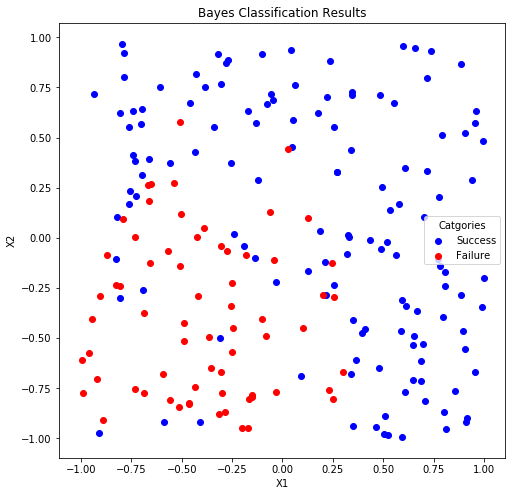

In [101]:
#e. plot all the data points on a graph, and indicate the success of failure of each datapoint
#set basic parameters for plotting
def plot_scatter():
    colors=['b','r']
    labels=['Success','Failure']
    fig, ax = plt.subplots(figsize = (8,8))

    #plot points of success first
    x1=df_bays[df_bays['Class_success']==True]['X1']
    x2=df_bays[df_bays['Class_success']==True]['X2']
    ax.scatter(x1,x2,c=colors[0],label=labels[0])

    #plot points of failure 
    x1=df_bays[df_bays['Class_success']==False]['X1']
    x2=df_bays[df_bays['Class_success']==False]['X2']
    ax.scatter(x1,x2,c=colors[1],label=labels[1])
    ax.plot()

    ax.legend(loc = 'center right', title = 'Catgories')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Bayes Classification Results')
    plt.show()
    plt.close()

plot_scatter()

Draw the decision boundary (**Region** in Python), overlying the scatter plot of each datapoints:

In [125]:
#define predict function of logistic bayes for X1, X2
def logis_bayes_predict(X):
    Y=[x[0]+x[0]*x[0]+x[1]+x[1]*x[1]+random.normalvariate(0,0.5) for x in X]
    success_prob=[math.exp(y)/(1+math.exp(y)) for y in Y]
    success_failure=[ prob>0.5 for prob in success_prob]
    #catsMap = {c : i for i, c in enumerate(np.unique(df_bays['Class_success']))}
    return np.array(lambda x: catsMap[x])(Z)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


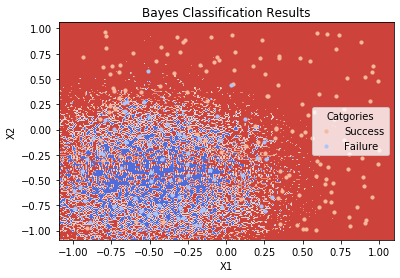

In [139]:
# f.plot the decision boundary, based on X1, X2-->Y-->Prob of sucess
#np.meshgrid, set regions
X1=df_bays['X1']
X2=df_bays['X2']
x_min, x_max = X1.min() *1.1, X1.max() *1.1
y_min, y_max = X2.min() *1.1, X2.max() *1.1
h = 0.01
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  
#predict the results of X1,X2, based on logistic regression bayes
Z = logis_bayes_predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
  
#plot the contour and regions of success (in blue) or failure(in red)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm) #Spectral)
    
#plot the scatter figure
#colors=['b','r']
labels=['Success','Failure']
pallet = seaborn.color_palette(palette='coolwarm', n_colors = len(set(df_bays['Class_success'])))
#plot points of success first
x1=df_bays[df_bays['Class_success']==True]['X1']
x2=df_bays[df_bays['Class_success']==True]['X2']
plt.scatter(x1,x2,s=10,c=pallet[1],label=labels[0])
#plot points of failure 
x1=df_bays[df_bays['Class_success']==False]['X1']
x2=df_bays[df_bays['Class_success']==False]['X2']
plt.scatter(x1,x2,s=10,c=pallet[0],label=labels[1])

plt.legend(loc = 'center right', title = 'Catgories')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Bayes Classification Results')
plt.show()
plt.close()

# Explore Simulated Differences between LDA and QDA

## Question 2
First implement the basic pipeline:
* Simulate a dataset of 1000 observations wih uniform distribution (-1,+1):

In [174]:
#i.generate uniform random variable of 1000
X=[[random.uniform(-1,1),random.uniform(-1,1)] for i in range(1000)]
X1=[x1 for (x1,x2) in X]
X2=[x2 for (x1,x2) in X]

* Calculate simulated Y: first calculate Y according to the f(x)=x1+x2 formula, and classify it accordingly:

In [187]:
Y_sim=[x1+x2+random.normalvariate(0,1) for [x1,x2] in X]
category=[y>=0 for y in Y_sim]

* Organize as a dataframe for ease of further analysis:

In [188]:
df_lda=pd.DataFrame({'X':X,'X1':X1,'X2':X2,'Y':Y,'Y_sim':Y_sim,'Category':category})
df_lda

,X,X1,X2,Y,Y_sim,Category
0,"[0.9311513237017663, 0.5978287942403575]",0.931151,0.597829,1.528980,2.199462,True
1,"[0.20377965714930402, -0.10740212866912402]",0.203780,-0.107402,0.096378,-1.025449,False
2,"[-0.3037578820481073, 0.6843852241909743]",-0.303758,0.684385,0.380627,-0.517976,False
3,"[0.20207055446397915, 0.675717091506645]",0.202071,0.675717,0.877788,-0.200419,False
4,"[-0.9496161779077608, -0.23921996515490385]",-0.949616,-0.239220,-1.188836,-1.241947,False
...,...,...,...,...,...,...
995,"[0.12449713351594638, 0.9514651811078527]",0.124497,0.951465,1.075962,-0.040482,False
996,"[-0.6860049132542325, -0.5024518136361364]",-0.686005,-0.502452,-1.188457,-0.626730,False
997,"[0.8747024531057492, -0.8546936481430818]",0.874702,-0.854694,0.020009,-1.058232,False
998,"[-0.21038379678902808, -0.4977608567305023]",-0.210384,-0.497761,-0.708145,-1.187256,False


* Split the Dataset into 70/30% for training or testing:

In [189]:
#define a function for split dataset (format as dataframe)
def split_data(df,prob_of_train):
    df = df.reindex(np.random.permutation(df.index))
    TrainIndex = int(prob_of_train * len(df))
    train_data = df[:TrainIndex].copy()
    test_data = df[TrainIndex:].copy()
    return train_data,test_data

In [190]:
#ii.split the dataset 
df_train,df_test=split_data(df_lda,0.7)

In [191]:
df_train

,X,X1,X2,Y,Y_sim,Category
725,"[0.23160784762522302, -0.9272341581296459]",0.231608,-0.927234,-0.695626,-0.881991,False
586,"[0.6845769923451543, 0.5885532664966773]",0.684577,0.588553,1.273130,2.400878,True
799,"[-0.6153529543978002, -0.4529645359233816]",-0.615353,-0.452965,-1.068317,0.343419,True
399,"[0.8969694758932365, 0.8938855770306906]",0.896969,0.893886,1.790855,1.340552,True
980,"[0.671220906978395, 0.7763370584233558]",0.671221,0.776337,1.447558,2.038790,True
...,...,...,...,...,...,...
615,"[0.4101228366709322, 0.2687868836562175]",0.410123,0.268787,0.678910,1.691895,True
309,"[0.46558609025200703, -0.04010068949474177]",0.465586,-0.040101,0.425485,0.978045,True
825,"[0.6497894528252863, 0.6500647762051279]",0.649789,0.650065,1.299854,1.376764,True
421,"[0.45473426279452056, 0.47129065941405357]",0.454734,0.471291,0.926025,1.208971,True


* Estimate and fit LDA and QDA models:

In [180]:
#import the packages
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

#consturct and fit in the model
clf_lda=LDA()
clf_qda=QDA()

In [196]:
clf_lda.fit(np.stack(df_train['X'], axis=0), df_train['Category'])

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [198]:
clf_qda.fit(np.stack(df_train['X'], axis=0), df_train['Category'])

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

* Calculate error rate for both LDA and QDA methods. for both training and testing dataset:

In [184]:
def calculate_error_rate(clf,df):
    predictions=clf.predict(np.stack(df['X'], axis=0))
    error_rate=1 -  sklearn.metrics.accuracy_score(df['Category'], predictions)
    return error_rate

In [201]:
error_rate_lda_train=calculate_error_rate(clf_lda,df_train)
error_rate_lda_test=calculate_error_rate(clf_lda,df_test)
print ('LDA training Error Rate:',round(error_rate_lda_train,4))
print ('LDA test Error Rate:',round(error_rate_lda_test,4))

LDA training Error Rate: 0.2871
LDA test Error Rate: 0.2867


In [203]:
error_rate_qda_train=calculate_error_rate(clf_qda,df_train)
error_rate_qda_test=calculate_error_rate(clf_qda,df_test)
print ('QDA training Error Rate:',round(error_rate_qda_train,4))
print ('QDA test Error Rate:',round(error_rate_qda_test,4))

QDA training Error Rate: 0.2871
QDA test Error Rate: 0.29


Write a function for the whole pipeline of LAD/QDA modeling with one dateset:

In [206]:
#major pipeline for lda and qda with one dataset

def lda_qda_pipeline(i):
    #generate raw data-X (X1,X2)
    random.seed(i)
    X=[[random.uniform(-1,1),random.uniform(-1,1)] for i in range(1000)]
    X1=[x1 for (x1,x2) in X]
    X2=[x2 for (x1,x2) in X]
    
    #generate raw data-Y_simulated, and calculate category (True or False) accordingly (Y_sim>=0, True)
    Y_sim=[x1+x2+random.normalvariate(0,1) for [x1,x2] in X]
    category=[y>=0 for y in Y_sim]
    
    #organize into dataframe
    df_lda=pd.DataFrame({'X':X,'X1':X1,'X2':X2,'Y':Y,'Y_sim':Y_sim,'Category':category})
    
    #split the dataset into training and test (70/30%)
    df_train,df_test=split_data(df_lda,0.7)
    
    #consturct and fit in the LDA model
    clf_lda=LDA()
    clf_lda.fit(np.stack(df_train['X'], axis=0), df_train['Category'])
    ER_lda_train=calculate_error_rate(clf_lda,df_train)
    ER_lda_test=calculate_error_rate(clf_lda,df_test)
    
    clf_qda=QDA()
    clf_qda.fit(np.stack(df_train['X'], axis=0), df_train['Category'])
    ER_qda_train=calculate_error_rate(clf_qda,df_train)
    ER_qda_test=calculate_error_rate(clf_qda,df_test)
    return ER_lda_train,ER_lda_test,ER_qda_train,ER_qda_test
    
#function for split dataset (format as dataframe)
def split_data(df,prob_of_train):
    df = df.reindex(np.random.permutation(df.index))
    TrainIndex = int(prob_of_train * len(df))
    train_data = df[:TrainIndex].copy()
    test_data = df[TrainIndex:].copy()
    return train_data,test_data

#function to calculate error_rate
def calculate_error_rate(clf,df):
    predictions=clf.predict(np.stack(df['X'], axis=0))
    error_rate=1 -  sklearn.metrics.accuracy_score(df['Category'], predictions)
    return error_rate

**1000:** Implement 1000 times and save all the error rate for LDA/QDA (train and test dataset):

In [212]:
#construct lists to restore error rates for both models (train and test)
ER_lda_train_all=[]
ER_lda_test_all=[]
ER_qda_train_all=[]
ER_qda_test_all=[]

for i in range(1000):
    #call the pipeline function to model LDA/QDA for each dataset
    ER_lda_train,ER_lda_test,ER_qda_train,ER_qda_test=lda_qda_pipeline(i)
    #save all the error rates results
    ER_lda_train_all.append(ER_lda_train)
    ER_lda_test_all.append(ER_lda_test)
    ER_qda_train_all.append(ER_qda_train)
    ER_qda_test_all.append(ER_qda_test)
    
#transform into dataframe structure 
df_ER=pd.DataFrame({'ER LDA Train':ER_lda_train_all,'ER LDA Test':ER_lda_test_all,'ER QDA Train':ER_qda_train_all,'ER QDA Test':ER_qda_test_all})

In [219]:
#all the error rates results
df_ER

,ER LDA Train,ER LDA Test,ER QDA Train,ER QDA Test
0,0.260000,0.296667,0.261429,0.296667
1,0.287143,0.273333,0.280000,0.280000
2,0.281429,0.290000,0.265714,0.290000
3,0.287143,0.290000,0.287143,0.280000
4,0.272857,0.263333,0.264286,0.243333
...,...,...,...,...
995,0.274286,0.253333,0.275714,0.270000
996,0.288571,0.300000,0.281429,0.296667
997,0.261429,0.270000,0.262857,0.273333
998,0.287143,0.316667,0.280000,0.316667


**Mean & SD:** Calculate the mean and std of error rates of LDA/QDA models (both training and test dataset):

In [223]:
#Calculate the mean and std of error rates of both models (train and test)
lda_train=[df_ER['ER LDA Train'].mean(),df_ER['ER LDA Train'].std()]
qda_train=[df_ER['ER QDA Train'].mean(),df_ER['ER QDA Train'].std()]
lda_test=[df_ER['ER LDA Test'].mean(),df_ER['ER LDA Test'].std()]
qda_test=[df_ER['ER QDA Test'].mean(),df_ER['ER QDA Test'].std()]
result=['Mean','SD']

df_ER_sum=pd.DataFrame({'ER LDA Train':lda_train,'ER LDA Test':lda_test,'ER QDA Train':qda_train,'ER QDA Test':qda_test},index=result)

In [224]:
df_ER_sum

,ER LDA Train,ER LDA Test,ER QDA Train,ER QDA Test
Mean,0.272426,0.276513,0.271359,0.276473
SD,0.016722,0.024902,0.016697,0.024819


As we can see from the table above, the averaged Error rates between LDA and QDA has no difference in both training and test dataset; it also has identical standard deviation between these two methods. Therefore, we could preliminarily conclude that if the bayes decision boundary is linear, the performance of LDA and QDA is close to each other and has no difference (both on Training and Test dataset).

To further examine this conclusion, I draw boxplot of error rates of these two methods to better see their distribution-*whether they are identical or not:*

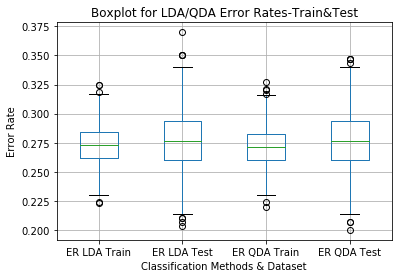

In [229]:
#draw boxplot graph on both LDA/QDA methods on Training and Test dataset
df_ER.plot.box(grid=True);
plt.xlabel('Classification Methods & Dataset');
plt.ylabel('Error Rate');
plt.title('Boxplot for LDA/QDA Error Rates-Train&Test');

From the boxplot above, we could see that error rates of LDA and QDA have totally identical distributions, for both training and test dataset; hence, I am more confirmed that if the Bayes decision boundary is linear,there is no difference of performance of these two methods (QDA and LDA).

## Question 3

To examine the conclusion under a different condition/pre-assumption: non-linear decision boundary, I repeat the whole procedure in Quesiton 2 except for changing the funciton of Y. 

First of all,revise basic pipeline function of each dataset in Question 2:

In [230]:
#major pipeline for lda and qda with one dataset

def lda_qda_pipeline_q3(i):
    #generate raw data-X (X1,X2)
    random.seed(i)
    X=[[random.uniform(-1,1),random.uniform(-1,1)] for i in range(1000)]
    X1=[x1 for (x1,x2) in X]
    X2=[x2 for (x1,x2) in X]
    
    #generate raw data-Y_simulated, and calculate category (True or False) accordingly (Y_sim>=0, True)
    Y_sim=[x1+x1*x1+x2+x2*x2+random.normalvariate(0,1) for [x1,x2] in X]
    category=[y>=0 for y in Y_sim]
    
    #organize into dataframe
    df_lda=pd.DataFrame({'X':X,'X1':X1,'X2':X2,'Y':Y,'Y_sim':Y_sim,'Category':category})
    
    #split the dataset into training and test (70/30%)
    df_train,df_test=split_data(df_lda,0.7)
    
    #consturct and fit in the LDA model
    clf_lda=LDA()
    clf_lda.fit(np.stack(df_train['X'], axis=0), df_train['Category'])
    ER_lda_train=calculate_error_rate(clf_lda,df_train)
    ER_lda_test=calculate_error_rate(clf_lda,df_test)
    
    clf_qda=QDA()
    clf_qda.fit(np.stack(df_train['X'], axis=0), df_train['Category'])
    ER_qda_train=calculate_error_rate(clf_qda,df_train)
    ER_qda_test=calculate_error_rate(clf_qda,df_test)
    return ER_lda_train,ER_lda_test,ER_qda_train,ER_qda_test
    
#function for split dataset (format as dataframe)
def split_data(df,prob_of_train):
    df = df.reindex(np.random.permutation(df.index))
    TrainIndex = int(prob_of_train * len(df))
    train_data = df[:TrainIndex].copy()
    test_data = df[TrainIndex:].copy()
    return train_data,test_data

#function to calculate error_rate
def calculate_error_rate(clf,df):
    predictions=clf.predict(np.stack(df['X'], axis=0))
    error_rate=1 -  sklearn.metrics.accuracy_score(df['Category'], predictions)
    return error_rate

**1000:** Implement 1000 times and save all the error rate for LDA/QDA (train and test dataset):

In [232]:
#construct lists to restore error rates for both models (train and test)
ER_lda_train_all=[]
ER_lda_test_all=[]
ER_qda_train_all=[]
ER_qda_test_all=[]

for i in range(1000):
    #call the pipeline function to model LDA/QDA for each dataset
    ER_lda_train,ER_lda_test,ER_qda_train,ER_qda_test=lda_qda_pipeline_q3(i)
    #save all the error rates results
    ER_lda_train_all.append(ER_lda_train)
    ER_lda_test_all.append(ER_lda_test)
    ER_qda_train_all.append(ER_qda_train)
    ER_qda_test_all.append(ER_qda_test)
    
#transform into dataframe structure 
df_ER2=pd.DataFrame({'ER LDA Train':ER_lda_train_all,'ER LDA Test':ER_lda_test_all,'ER QDA Train':ER_qda_train_all,'ER QDA Test':ER_qda_test_all})

In [233]:
#all the error rates results over 1000 iterations
df_ER2

,ER LDA Train,ER LDA Test,ER QDA Train,ER QDA Test
0,0.285714,0.283333,0.278571,0.280000
1,0.271429,0.260000,0.264286,0.243333
2,0.288571,0.293333,0.265714,0.293333
3,0.298571,0.283333,0.300000,0.233333
4,0.251429,0.203333,0.234286,0.203333
...,...,...,...,...
995,0.292857,0.243333,0.267143,0.236667
996,0.285714,0.290000,0.262857,0.256667
997,0.270000,0.283333,0.257143,0.283333
998,0.272857,0.306667,0.254286,0.293333


**Mean & SD:** Calculate the mean and std of error rates of LDA/QDA models (both training and test dataset):

In [235]:
#Calculate the mean and std of error rates of both models (train and test)
lda_train=[df_ER2['ER LDA Train'].mean(),df_ER2['ER LDA Train'].std()]
qda_train=[df_ER2['ER QDA Train'].mean(),df_ER2['ER QDA Train'].std()]
lda_test=[df_ER2['ER LDA Test'].mean(),df_ER2['ER LDA Test'].std()]
qda_test=[df_ER2['ER QDA Test'].mean(),df_ER2['ER QDA Test'].std()]
result=['Mean','SD']

df_ER2_sum=pd.DataFrame({'ER LDA Train':lda_train,'ER LDA Test':lda_test,'ER QDA Train':qda_train,'ER QDA Test':qda_test},index=result)

In [236]:
df_ER2_sum

,ER LDA Train,ER LDA Test,ER QDA Train,ER QDA Test
Mean,0.272276,0.274433,0.258761,0.261427
SD,0.017130,0.026776,0.016641,0.027081


As we can see from the table above, while standard deviation of error rates is similar between LDA and QDA on Training and Test Dataset, the mean of error rates is generally small with QDA methods, on both Training and Test dataset (generally, error rates of Test dataset is a little bit higher than Training dataset, and is at a reasonable range).Performance of QDA on non-linear decision boundary is better than LDA.

To further examine this conclusion, I draw boxplot of error rates of these two methods to better see their distribution-*whether QDA generally performs better than LDA on non-linear dataset:*

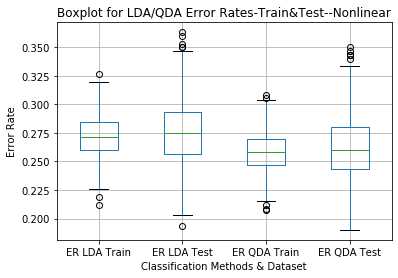

In [237]:
#draw boxplot graph on both LDA/QDA methods on Training and Test dataset
df_ER2.plot.box(grid=True);
plt.xlabel('Classification Methods & Dataset');
plt.ylabel('Error Rate');
plt.title('Boxplot for LDA/QDA Error Rates-Train&Test--Nonlinear');

The boxplot further proves that, QDA performs generally better than LDA with non-linear dataset. Overall, the error rates of QDA is smaller than LDA both on Training and Test dataset. 

## Question 4

To examine LDA/QDA's performance on different size of sample from 100, to 100000. First of all, I revise the basic pipline function of each single dataset to acommondate for different sample sizes:

In [262]:
#major pipeline for lda and qda with one dataset

def lda_qda_pipeline_q4(i,sample_size):
    #generate raw data-X (X1,X2)
    random.seed(i)
    X=[[random.uniform(-1,1),random.uniform(-1,1)] for i in range(sample_size)]
    X1=[x1 for (x1,x2) in X]
    X2=[x2 for (x1,x2) in X]
    
    #generate raw data-Y_simulated, and calculate category (True or False) accordingly (Y_sim>=0, True)
    Y_sim=[x1+x2+random.normalvariate(0,1) for [x1,x2] in X]
    category=[y>=0 for y in Y_sim]
    
    #organize into dataframe
    df_lda=pd.DataFrame({'X':X,'X1':X1,'X2':X2,'Y_sim':Y_sim,'Category':category})
    
    #split the dataset into training and test (70/30%)
    df_train,df_test=split_data(df_lda,0.7)
    
    #consturct and fit in the LDA model
    clf_lda=LDA()
    clf_lda.fit(np.stack(df_train['X'], axis=0), df_train['Category'])
    ER_lda_train=calculate_error_rate(clf_lda,df_train)
    ER_lda_test=calculate_error_rate(clf_lda,df_test)
    
    clf_qda=QDA()
    clf_qda.fit(np.stack(df_train['X'], axis=0), df_train['Category'])
    ER_qda_train=calculate_error_rate(clf_qda,df_train)
    ER_qda_test=calculate_error_rate(clf_qda,df_test)
    return ER_lda_train,ER_lda_test,ER_qda_train,ER_qda_test
    
#function for split dataset (format as dataframe)
def split_data(df,prob_of_train):
    df = df.reindex(np.random.permutation(df.index))
    TrainIndex = int(prob_of_train * len(df))
    train_data = df[:TrainIndex].copy()
    test_data = df[TrainIndex:].copy()
    return train_data,test_data

#function to calculate error_rate
def calculate_error_rate(clf,df):
    predictions=clf.predict(np.stack(df['X'], axis=0))
    error_rate=1 -  sklearn.metrics.accuracy_score(df['Category'], predictions)
    return error_rate

**1000 | 4 Size of Sample:** Implement 1000 times and save all the error rate for LDA/QDA (train and test dataset):

In [247]:
#create lists to save error rates data for 4 conditions
ER_lda_train_all=[[]]*4
ER_lda_test_all=[[]]*4
ER_qda_train_all=[[]]*4
ER_qda_test_all=[[]]*4

In [264]:
#iterate over 4 types of sample sizes
for sam_id, sample_size in enumerate([100,1000,10000,100000]):
    iteration_nums=1000;
    #save error rate for each condition
    ER_lda_train_all0=[]
    ER_lda_test_all0=[]
    ER_qda_train_all0=[]
    ER_qda_test_all0=[]
    
    for i in range(iteration_nums):
        #call the pipeline function to model LDA/QDA for each dataset
        ER_lda_train,ER_lda_test,ER_qda_train,ER_qda_test=lda_qda_pipeline_q4(i,sample_size)
        #save all the error rates results
        ER_lda_train_all0.append(ER_lda_train)
        ER_lda_test_all0.append(ER_lda_test)
        ER_qda_train_all0.append(ER_qda_train)
        ER_qda_test_all0.append(ER_qda_test)
    
    ER_lda_train_all[sam_id]=ER_lda_train_all0
    ER_lda_test_all[sam_id]=ER_lda_test_all0
    ER_qda_train_all[sam_id]=ER_qda_train_all0
    ER_qda_test_all[sam_id]=ER_qda_test_all0

In [280]:
#transform error rates of 1000 iterations, LDA/LDR, 4 sample sizes into one dataframe structure 
df_ER3=pd.DataFrame({'ER LDA Test 100':ER_lda_test_all[0],'ER QDA Test 100':ER_qda_test_all[0],'ER LDA Test 1000':ER_lda_test_all[1],'ER QDA Test 1000':ER_qda_test_all[1],'ER LDA Test 10000':ER_lda_test_all[2],'ER QDA Test 10000':ER_qda_test_all[2],'ER LDA Test 100000':ER_lda_test_all[3],'ER QDA Test 100000':ER_qda_test_all[3]})
df_ER3.head()

,ER LDA Test 100,ER QDA Test 100,ER LDA Test 1000,ER QDA Test 1000,ER LDA Test 10000,ER QDA Test 10000,ER LDA Test 100000,ER QDA Test 100000
0,0.366667,0.366667,0.286667,0.290000,0.295000,0.295333,0.277667,0.278267
1,0.266667,0.233333,0.283333,0.286667,0.277667,0.277333,0.273833,0.273667
2,0.166667,0.200000,0.293333,0.290000,0.282000,0.281667,0.272400,0.272767
3,0.266667,0.266667,0.286667,0.286667,0.280333,0.280000,0.273533,0.273533
4,0.233333,0.266667,0.253333,0.266667,0.288000,0.286000,0.280067,0.280000


**Mean & SD | 4 Sample Size:** Calculate the mean and std of error rates of LDA/QDA models on test dataset, for 4 sample size

In [281]:
#Calculate the mean and std of error rates of both models (Test dataset) for 4 sample sizes
lda_test1=list(map(lambda x:round(x,3),[df_ER3['ER LDA Test 100'].mean(),df_ER3['ER LDA Test 100'].std()]))
qda_test1=list(map(lambda x:round(x,3),[df_ER3['ER QDA Test 100'].mean(),df_ER3['ER QDA Test 100'].std()]))
lda_test2=list(map(lambda x:round(x,3),[df_ER3['ER LDA Test 1000'].mean(),df_ER3['ER LDA Test 1000'].std()]))
qda_test2=list(map(lambda x:round(x,3),[df_ER3['ER QDA Test 1000'].mean(),df_ER3['ER QDA Test 1000'].std()]))
lda_test3=list(map(lambda x:round(x,3),[df_ER3['ER LDA Test 10000'].mean(),df_ER3['ER LDA Test 10000'].std()]))
qda_test3=list(map(lambda x:round(x,3),[df_ER3['ER QDA Test 10000'].mean(),df_ER3['ER QDA Test 10000'].std()]))
lda_test4=list(map(lambda x:round(x,3),[df_ER3['ER LDA Test 100000'].mean(),df_ER3['ER LDA Test 100000'].std()]))
qda_test4=list(map(lambda x:round(x,3),[df_ER3['ER QDA Test 100000'].mean(),df_ER3['ER QDA Test 100000'].std()]))
result=['Mean','SD']

df_ER_sum=pd.DataFrame({'ER LDA Test 100':lda_test1,'ER QDA Test 100':qda_test1,'ER LDA Test 1000':lda_test2,'ER QDA Test 1000':qda_test2,'ER LDA Test 10000':lda_test3,'ER QDA Test 10000':qda_test3,'ER LDA Test 100000':lda_test4,'ER QDA Test 100000':qda_test4},index=result)

In [282]:
df_ER_sum

,ER LDA Test 100,ER QDA Test 100,ER LDA Test 1000,ER QDA Test 1000,ER LDA Test 10000,ER QDA Test 10000,ER LDA Test 100000,ER QDA Test 100000
Mean,0.286,0.287,0.275,0.276,0.276,0.276,0.275,0.275
SD,0.084,0.085,0.025,0.025,0.008,0.008,0.003,0.003


* From the table above, we could basicly find that the average error rate gradually converged to a stable level on test dataset, for both LDA and QDA methods, around 27.5%. The standard deviation decreases greatly from 100 samples (0.084~0.085) to 100000 samples (0.003). The difference between LDA and QDA decreases.

**Plot Bar & Line** graphs for better visualization: 

In [287]:
#organize the error rates for plot
ER_lda_all_sam_mean=list(map(lambda x: sum(x)/1000,ER_lda_test_all))
ER_lda_all_sam_std=list(map(lambda x: np.std(np.array(x),ddof=1),ER_lda_test_all))
ER_qda_all_sam_mean=list(map(lambda x: sum(x)/1000,ER_qda_test_all))
ER_qda_all_sam_std=list(map(lambda x: np.std(np.array(x),ddof=1),ER_qda_test_all))

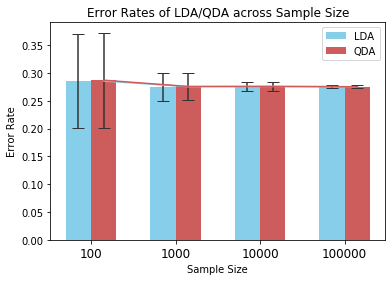

In [314]:
#Plot bar graph, with lines and std for LDA/QDA and each sample size
label=['100','1000','10000','100000']
index=np.arange(len(label))
width=0.3

mean1=ER_lda_all_sam_mean
std1=ER_lda_all_sam_std
mean2=ER_qda_all_sam_mean
std2=ER_qda_all_sam_std

plt.bar(index,mean1,width,yerr=std1,error_kw = {'ecolor' : '0.2', 'capsize' :6},color='SkyBlue',label='LDA') 
plt.bar(index+width,mean2,width,yerr=std2,error_kw = {'ecolor' : '0.2', 'capsize' :6},color='IndianRed',label='QDA')
plt.plot(index+width,mean1,color='SkyBlue')
plt.plot(index+width,mean2,color='IndianRed')

plt.xlabel('Sample Size')
plt.ylabel('Error Rate')
plt.xticks(index+width/2,label,FontSize=12)
plt.legend()
plt.title('Error Rates of LDA/QDA across Sample Size');

The bar and line graph further validates the finding above: 1) with the increase of sample size, the variance and bias (error-rate) of prediction both drop,especially for the variance that large sample size capturing more information in the dataset contributes to a much more stable and better model,with both QDA/LDA techqniues; 2) because QDA is more flexible, with higher variance initially, its variance and accuracy should improve most, while it is not very clear from this graph.

# Modeling voter turnout

## Question 5

* First of all, loading the dataset into dataframe:

In [355]:
#load the dataset into a DataFrame
df_wb=pd.read_csv('mental_health.csv')
df_wb

,vote96,mhealth_sum,age,educ,black,female,married,inc10
0,1.0,0.0,60.0,12.0,0,0,0.0,4.8149
1,1.0,NaN,27.0,17.0,0,1,0.0,1.7387
2,1.0,1.0,36.0,12.0,0,0,1.0,8.8273
3,0.0,7.0,21.0,13.0,0,0,0.0,1.7387
4,0.0,NaN,35.0,16.0,0,1,0.0,4.8149
...,...,...,...,...,...,...,...,...
2827,1.0,NaN,73.0,14.0,0,1,1.0,2.2737
2828,1.0,1.0,40.0,12.0,0,1,0.0,1.7387
2829,1.0,2.0,73.0,6.0,0,0,1.0,2.2737
2830,1.0,4.0,47.0,12.0,0,0,0.0,3.4774


Then, cleaning the data, drop NAN and aggregate all features:

In [369]:
#drop NaN data
df_wb.dropna(inplace=True)

In [370]:
#aggregate all predictors
df_wb['feature']=[np.stack((item[1]['mhealth_sum'],item[1]['age'],item[1]['educ'],item[1]['black'],item[1]['female'],item[1]['married'],item[1]['inc10']))for item in df_wb.iterrows()]

In [371]:
df_wb

,vote96,mhealth_sum,age,educ,black,female,married,inc10,feature
0,1.0,0.0,60.0,12.0,0,0,0.0,4.8149,"[0.0, 60.0, 12.0, 0.0, 0.0, 0.0, 4.81489992141..."
2,1.0,1.0,36.0,12.0,0,0,1.0,8.8273,"[1.0, 36.0, 12.0, 0.0, 0.0, 1.0, 8.82730007171..."
3,0.0,7.0,21.0,13.0,0,0,0.0,1.7387,"[7.0, 21.0, 13.0, 0.0, 0.0, 0.0, 1.73870003223..."
7,0.0,6.0,29.0,13.0,0,0,0.0,10.6998,"[6.0, 29.0, 13.0, 0.0, 0.0, 0.0, 10.6997995376..."
11,1.0,1.0,41.0,15.0,1,1,1.0,8.8273,"[1.0, 41.0, 15.0, 1.0, 1.0, 1.0, 8.82730007171..."
...,...,...,...,...,...,...,...,...,...
2822,1.0,2.0,37.0,14.0,0,0,1.0,5.8849,"[2.0, 37.0, 14.0, 0.0, 0.0, 1.0, 5.88490009307..."
2823,1.0,2.0,30.0,12.0,0,1,1.0,3.4774,"[2.0, 30.0, 12.0, 0.0, 1.0, 1.0, 3.47740006446..."
2828,1.0,1.0,40.0,12.0,0,1,0.0,1.7387,"[1.0, 40.0, 12.0, 0.0, 1.0, 0.0, 1.73870003223..."
2829,1.0,2.0,73.0,6.0,0,0,1.0,2.2737,"[2.0, 73.0, 6.0, 0.0, 0.0, 1.0, 2.273699998855..."


Split the dataset into Training and Test (70/30):

In [372]:
#split the dataset
df_train,df_test=split_data(df_wb,0.7)

Training over all the possible models (Logistic Regression, LDA, QDA, Naive Bayes, KNN) and calculate the error rate, draw ROC curves:

In [481]:
#create lists to save all error rate results
ER_all=[]
AUC_all=[]
method_label=[]

Revise the error rate/AUC calculation function and define ROC plot function:

In [431]:
#function to calculate error_rate
def calculate_error_rate(clf,df_feature,df_category):
    predictions=clf.predict(np.stack(df_feature, axis=0))
    error_rate=1 -  sklearn.metrics.accuracy_score(df_category, predictions)
    return error_rate

def calculate_auc(clf,df_feature,df_category):
    predictions=clf.predict(np.stack(df_feature, axis=0))
    auc_score=sklearn.metrics.roc_auc_score(df_category, predictions)
    return auc_score

In [401]:
#function to plot ROC
def plot_ROC_curve(model,data_feature,data_category,method_des):
    clf=model
    classes = clf.classes_
    try:
        probs = clf.predict_proba(np.stack(data_feature, axis=0))
    except AttributeError:
        print("The {} classifier does not apear to support prediction probabilties, so an ROC curve can't be created. You can try adding `probability = True` to the model specification or use a different model.".format(type(clf)))
        return
    predictions = clf.predict(np.stack(data_feature, axis=0))

    #setup axis for plotting
    fig, ax = plt.subplots(figsize = (5,5))

    #We can return the AUC values, in case they are useful
    aucVals = []
    for classIndex, className in enumerate(classes):        #Setup binary classes
        truths = [1 if c == className else 0 for c in data_category]
        predict = [1 if c == className else 0 for c in predictions]
        scores = probs[:, classIndex]

        #Get the ROC curve
        fpr, tpr, thresholds = sklearn.metrics.roc_curve(truths, scores)
        auc = sklearn.metrics.auc(fpr, tpr)
        aucVals.append(auc)

        #Plot the class's line
        ax.plot(fpr, tpr, label = "{} (AUC ${:.3f}$)".format(str(className).split(':')[0], auc))

    #Make the plot nice, then display it
    ax.set_title('Receiver Operating Characteristics')
    plt.plot([0,1], [0,1], color = 'k', linestyle='--')
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.legend(loc = 'lower right')
    plt.show()
    #plt.close()

Train the LDA model first, calculate ROC, error rate and plot ROC curve:

In [482]:
clf_lda=LDA()
clf_lda.fit(np.stack(df_train['feature'], axis=0), df_train['vote96'])
ER_lda=calculate_error_rate(clf_lda,df_test['feature'],df_test['vote96'])
AUC_lda=calculate_auc(clf_lda,df_test['feature'],df_test['vote96'])
print('error rate:',round(ER_lda,2))
print('AUC:',round(AUC_lda,2))

error rate: 0.27
AUC: 0.64


In [508]:
# save the error rate results
ER_all.append(ER_lda)
AUC_all.append(AUC_lda)
method_label.append('LDA')

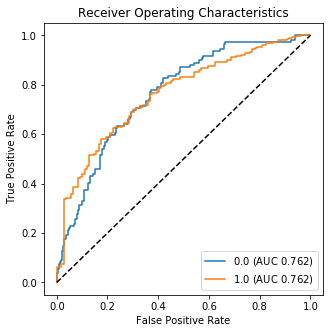

In [509]:
#plot AUC curve
plot_ROC_curve(clf_lda,df_test['feature'],df_test['vote96'],'LDA')

Train all the other models and save the evaluation results, show the results all together in the end:

In [484]:
#fit in logistic regression
clf_log=sklearn.linear_model.LogisticRegression()
clf_log.fit(np.stack(df_train['feature'], axis=0), df_train['vote96'])
ER_lg=calculate_error_rate(clf_log,df_test['feature'],df_test['vote96'])
AUC_lg=calculate_auc(clf_log,df_test['feature'],df_test['vote96'])

#save the evluations
ER_all.append(ER_lg)
AUC_all.append(AUC_lg)
method_label.append('Logs Reg')

C:\Users\zhuangchu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [485]:
#fit in QDA
clf_qda=QDA()
clf_qda.fit(np.stack(df_train['feature'], axis=0), df_train['vote96'])
ER_qda=calculate_error_rate(clf_qda,df_test['feature'],df_test['vote96'])
AUC_qda=calculate_auc(clf_qda,df_test['feature'],df_test['vote96'])

#save the evluations
ER_all.append(ER_qda)
AUC_all.append(AUC_qda)
method_label.append('QDA')

In [486]:
#fit in Naive Bayes
from sklearn.naive_bayes import GaussianNB
clf_nb=GaussianNB()
clf_nb.fit(np.stack(df_train['feature'], axis=0), df_train['vote96'])
ER_nb=calculate_error_rate(clf_nb,df_test['feature'],df_test['vote96'])
AUC_nb=calculate_auc(clf_nb,df_test['feature'],df_test['vote96'])

#save the evluations
ER_all.append(ER_nb)
AUC_all.append(AUC_nb)
method_label.append('Naive Bayes')

In [487]:
#fit in kNN, 1 neighbour
from sklearn.neighbors import KNeighborsClassifier
clf_knn1=KNeighborsClassifier(1, weights='distance')
clf_knn1.fit(np.stack(df_train['feature'], axis=0), df_train['vote96'])
ER_knn1=calculate_error_rate(clf_knn1,df_test['feature'],df_test['vote96'])
AUC_knn1=calculate_auc(clf_knn1,df_test['feature'],df_test['vote96'])

#save the evluations
ER_all.append(ER_knn1)
AUC_all.append(AUC_knn1)
method_label.append('kNN1')

In [488]:
#fit in kNN, 2 neighbour
clf_knn2=KNeighborsClassifier(2, weights='distance')
clf_knn2.fit(np.stack(df_train['feature'], axis=0), df_train['vote96'])
ER_knn2=calculate_error_rate(clf_knn2,df_test['feature'],df_test['vote96'])
AUC_knn2=calculate_auc(clf_knn2,df_test['feature'],df_test['vote96'])

#save the evluations
ER_all.append(ER_knn2)
AUC_all.append(AUC_knn2)
method_label.append('kNN2')

In [489]:
#fit in kNN, 3 neighbour
clf_knn3=KNeighborsClassifier(3, weights='distance')
clf_knn3.fit(np.stack(df_train['feature'], axis=0), df_train['vote96'])
ER_knn3=calculate_error_rate(clf_knn3,df_test['feature'],df_test['vote96'])
AUC_knn3=calculate_auc(clf_knn3,df_test['feature'],df_test['vote96'])

#save the evluations
ER_all.append(ER_knn3)
AUC_all.append(AUC_knn3)
method_label.append('kNN3')

In [490]:
#fit in kNN, 4 neighbour
clf_knn4=KNeighborsClassifier(4, weights='distance')
clf_knn4.fit(np.stack(df_train['feature'], axis=0), df_train['vote96'])
ER_knn4=calculate_error_rate(clf_knn4,df_test['feature'],df_test['vote96'])
AUC_knn4=calculate_auc(clf_knn4,df_test['feature'],df_test['vote96'])

#save the evluations
ER_all.append(ER_knn4)
AUC_all.append(AUC_knn4)
method_label.append('kNN4')

In [491]:
#fit in kNN, 5 neighbour
from sklearn.neighbors import KNeighborsClassifier
clf_knn5=KNeighborsClassifier(5, weights='distance')
clf_knn5.fit(np.stack(df_train['feature'], axis=0), df_train['vote96'])
ER_knn5=calculate_error_rate(clf_knn5,df_test['feature'],df_test['vote96'])
AUC_knn5=calculate_auc(clf_knn5,df_test['feature'],df_test['vote96'])

#save the evluations
ER_all.append(ER_knn5)
AUC_all.append(AUC_knn5)
method_label.append('kNN5')

In [492]:
#fit in kNN, 6 neighbour
from sklearn.neighbors import KNeighborsClassifier
clf_knn6=KNeighborsClassifier(6, weights='distance')
clf_knn6.fit(np.stack(df_train['feature'], axis=0), df_train['vote96'])
ER_knn6=calculate_error_rate(clf_knn6,df_test['feature'],df_test['vote96'])
AUC_knn6=calculate_auc(clf_knn6,df_test['feature'],df_test['vote96'])

#save the evluations
ER_all.append(ER_knn6)
AUC_all.append(AUC_knn6)
method_label.append('kNN6')

In [493]:
#fit in kNN, 7 neighbour
from sklearn.neighbors import KNeighborsClassifier
clf_knn7=KNeighborsClassifier(7, weights='distance')
clf_knn7.fit(np.stack(df_train['feature'], axis=0), df_train['vote96'])
ER_knn7=calculate_error_rate(clf_knn7,df_test['feature'],df_test['vote96'])
AUC_knn7=calculate_auc(clf_knn7,df_test['feature'],df_test['vote96'])

#save the evluations
ER_all.append(ER_knn7)
AUC_all.append(AUC_knn7)
method_label.append('kNN7')

In [494]:
#fit in kNN, 8 neighbour
from sklearn.neighbors import KNeighborsClassifier
clf_knn8=KNeighborsClassifier(8, weights='distance')
clf_knn8.fit(np.stack(df_train['feature'], axis=0), df_train['vote96'])
ER_knn8=calculate_error_rate(clf_knn8,df_test['feature'],df_test['vote96'])
AUC_knn8=calculate_auc(clf_knn8,df_test['feature'],df_test['vote96'])

#save the evluations
ER_all.append(ER_knn8)
AUC_all.append(AUC_knn8)
method_label.append('kNN8')

In [495]:
#fit in kNN, 9 neighbour
from sklearn.neighbors import KNeighborsClassifier
clf_knn9=KNeighborsClassifier(9, weights='distance')
clf_knn9.fit(np.stack(df_train['feature'], axis=0), df_train['vote96'])
ER_knn9=calculate_error_rate(clf_knn9,df_test['feature'],df_test['vote96'])
AUC_knn9=calculate_auc(clf_knn9,df_test['feature'],df_test['vote96'])

#save the evluations
ER_all.append(ER_knn9)
AUC_all.append(AUC_knn9)
method_label.append('kNN9')

In [496]:
#fit in kNN, 3 neighbour
from sklearn.neighbors import KNeighborsClassifier
clf_knn10=KNeighborsClassifier(10, weights='distance')
clf_knn10.fit(np.stack(df_train['feature'], axis=0), df_train['vote96'])
ER_knn10=calculate_error_rate(clf_knn10,df_test['feature'],df_test['vote96'])
AUC_knn10=calculate_auc(clf_knn10,df_test['feature'],df_test['vote96'])

#save the evluations
ER_all.append(ER_knn10)
AUC_all.append(AUC_knn10)
method_label.append('kNN10')

Plot all the error rate scores across all 14 models (LDA, QDA, Logistic Regression, Naive Bayes, kNN):

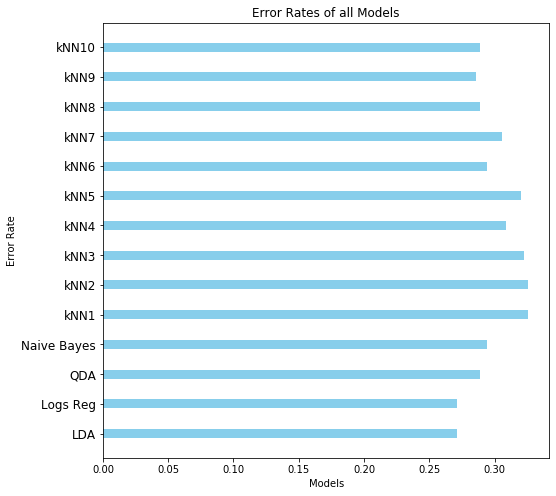

In [505]:
#Plot bar graph, error rates of all 14 models:
#method_label
method_num=len(method_label)
index=np.arange(method_num)
width=0.3

mean1=ER_all
plt.figure(figsize=(8,8))
plt.barh(index,mean1,width,color='SkyBlue') 
#plt.bar(index+width,mean2,width,yerr=std2,error_kw = {'ecolor' : '0.2', 'capsize' :6},color='IndianRed',label='QDA')

plt.xlabel('Models')
plt.ylabel('Error Rate')
plt.yticks(index,method_label,FontSize=12)
plt.title('Error Rates of all Models');

Show the error rate scores in table:

In [507]:
ER_all_df=pd.DataFrame({'error_rate':ER_all},index=method_label)
ER_all_df

,error_rate
LDA,0.271429
Logs Reg,0.271429
QDA,0.288571
Naive Bayes,0.294286
kNN1,0.325714
kNN2,0.325714
kNN3,0.322857
kNN4,0.308571
kNN5,0.320000
kNN6,0.294286


## Conclusion: 

Combined with the graph and table below and above, overall, LDA has the best performance, lowest error rate (0.27)and highest AUC score(0.762).Accordingly, LDA has the best performance.

Logstic Regression and kNN8~10 also performan well, relative lower error rate and high AUC scores.kNN1 is the worst model, highest error rate (0.325) and lowest AUC score (0.625).Overall, the difference among models is not significant.

Plot ROC curves for all models: 

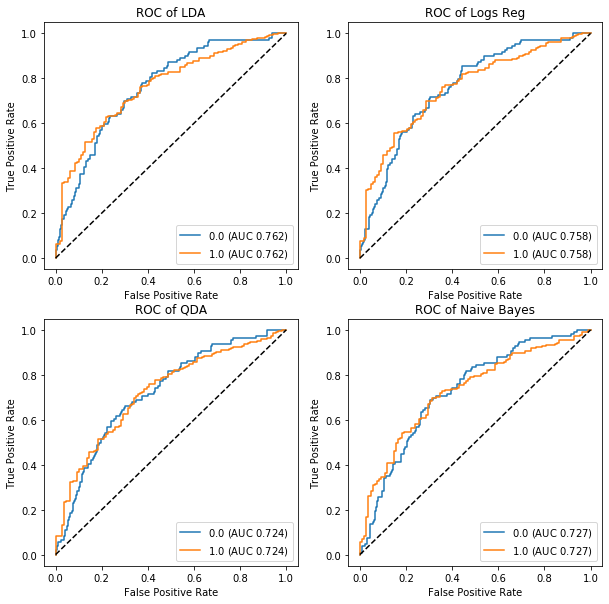

In [467]:
plt.figure(figsize=(10,10))
plot_ROC_curve_sub(clf_lda,df_test['feature'],df_test['vote96'],'LDA',221)
plot_ROC_curve_sub(clf_log,df_test['feature'],df_test['vote96'],'Logs Reg',222)
plot_ROC_curve_sub(clf_qda,df_test['feature'],df_test['vote96'],'QDA',223)
plot_ROC_curve_sub(clf_nb,df_test['feature'],df_test['vote96'],'Naive Bayes',224)

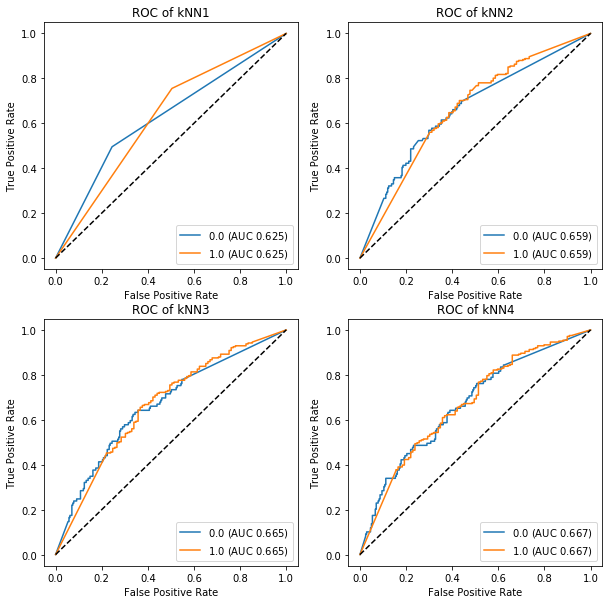

In [502]:
plt.figure(figsize=(10,10))
plot_ROC_curve_sub(clf_knn1,df_test['feature'],df_test['vote96'],'kNN1',221)
plot_ROC_curve_sub(clf_knn2,df_test['feature'],df_test['vote96'],'kNN2',222)
plot_ROC_curve_sub(clf_knn3,df_test['feature'],df_test['vote96'],'kNN3',223)
plot_ROC_curve_sub(clf_knn4,df_test['feature'],df_test['vote96'],'kNN4',224)

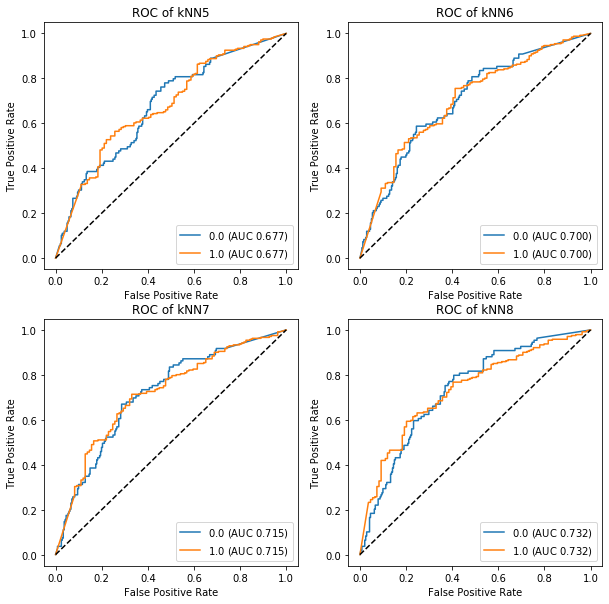

In [503]:
plt.figure(figsize=(10,10))
plot_ROC_curve_sub(clf_knn5,df_test['feature'],df_test['vote96'],'kNN5',221)
plot_ROC_curve_sub(clf_knn6,df_test['feature'],df_test['vote96'],'kNN6',222)
plot_ROC_curve_sub(clf_knn7,df_test['feature'],df_test['vote96'],'kNN7',223)
plot_ROC_curve_sub(clf_knn8,df_test['feature'],df_test['vote96'],'kNN8',224)

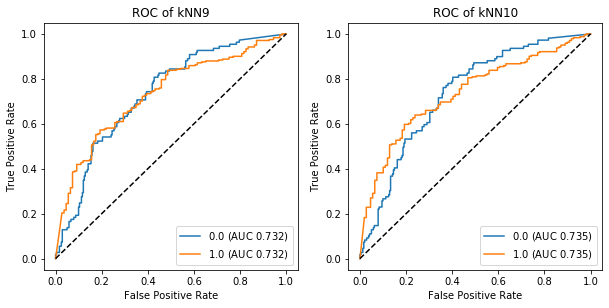

In [504]:
plt.figure(figsize=(10,10))
plot_ROC_curve_sub(clf_knn9,df_test['feature'],df_test['vote96'],'kNN9',221)
plot_ROC_curve_sub(clf_knn10,df_test['feature'],df_test['vote96'],'kNN10',222)

In [424]:
#function to plot ROC of subplots
def plot_ROC_curve_sub(model,data_feature,data_category,method_des,loc):
    clf=model
    classes = clf.classes_
    try:
        probs = clf.predict_proba(np.stack(data_feature, axis=0))
    except AttributeError:
        print("The {} classifier does not apear to support prediction probabilties, so an ROC curve can't be created. You can try adding `probability = True` to the model specification or use a different model.".format(type(clf)))
        return
    predictions = clf.predict(np.stack(data_feature, axis=0))

    #setup axis for plotting
    #fig, ax = plt.subplot(221)
    plt.subplot(loc)
    
    #We can return the AUC values, in case they are useful
    aucVals = []
    for classIndex, className in enumerate(classes):        #Setup binary classes
        truths = [1 if c == className else 0 for c in data_category]
        predict = [1 if c == className else 0 for c in predictions]
        scores = probs[:, classIndex]

        #Get the ROC curve
        fpr, tpr, thresholds = sklearn.metrics.roc_curve(truths, scores)
        auc = sklearn.metrics.auc(fpr, tpr)
        aucVals.append(auc)

        #Plot the class's line
        plt.plot(fpr, tpr, label = "{} (AUC ${:.3f}$)".format(str(className).split(':')[0], auc))

    #Make the plot nice, then display it
    plt.title('ROC of '+method_des)
    plt.plot([0,1], [0,1], color = 'k', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc = 'lower right')
    plt.show()
    #plt.close()